In [1]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# conn = psycopg2.connect(dbname=r"Dataport Database", host=r"dataport.cloud", port=r"5434", user=r"MbTxYAkAU8FL", password=r"XSWBO6hrOkJk") #No idea why this doesn't work

In [4]:
weather = pd.read_csv('C:/Users/bfesc/Documents/Master_thesis/master_data/dataport/weather-2017.csv', index_col=0)
weather.index = pd.to_datetime(weather.index)
weather.head()

,latitude,longitude,cloud_cover
localhour,,,
2017-01-01 06:00:00,30.292432,-97.699662,0.06
2017-01-01 07:00:00,30.292432,-97.699662,0.06
2017-01-01 08:00:00,30.292432,-97.699662,0.06
2017-01-01 09:00:00,30.292432,-97.699662,0.06
2017-01-01 10:00:00,30.292432,-97.699662,0.05


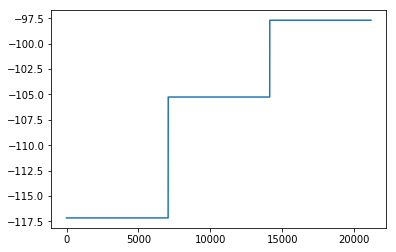

In [5]:
plt.plot(np.sort(weather['longitude'].values))
plt.show()

In [6]:
weather_austin = weather['cloud_cover'].iloc[np.where(weather['longitude'] > -100)]
weather_boulder = weather['cloud_cover'].iloc[np.where(weather['latitude'] > 40)]
weather_san_diego = weather['cloud_cover'].iloc[np.where(weather['longitude'] < -115)]

weather_austin = weather_austin.groupby(weather_austin.index).first()
weather_austin = weather_austin.resample('15min').bfill()
weather_boulder = weather_boulder.groupby(weather_boulder.index).first()
weather_san_diego = weather_san_diego.groupby(weather_san_diego.index).first()
weather_austin.head()

localhour
2017-01-01 06:00:00    0.06
2017-01-01 06:15:00    0.06
2017-01-01 06:30:00    0.06
2017-01-01 06:45:00    0.06
2017-01-01 07:00:00    0.06
Freq: 15T, Name: cloud_cover, dtype: float64

Weather data from mid-september to late november is missing.

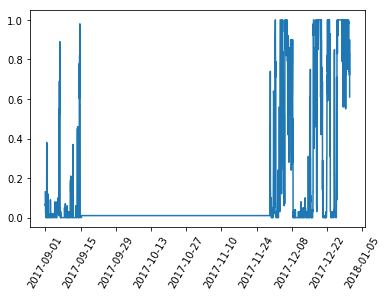

In [7]:
plt.plot(weather_austin.loc[pd.to_datetime('2017-09-01'):pd.to_datetime('2017-12-31')])#.resample('24h').mean())
# plt.plot(weather_boulder.loc[pd.to_datetime('2017-09-01'):pd.to_datetime('2017-11-01')])
# plt.plot(weather_san_diego.loc[pd.to_datetime('2017-09-01'):pd.to_datetime('2017-11-01')])
plt.xticks(rotation=60)
plt.show()

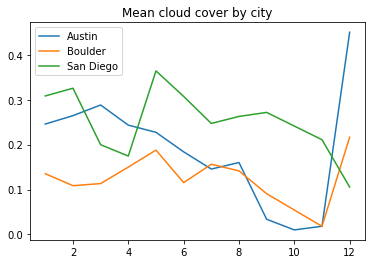

In [8]:
plt.plot(weather_austin.groupby(weather_austin.index.month).mean(), label='Austin')
plt.plot(weather_boulder.groupby(weather_boulder.index.month).mean(), label='Boulder')
plt.plot(weather_san_diego.groupby(weather_san_diego.index.month).mean(), label='San Diego')
plt.title("Mean cloud cover by city")
plt.legend()
plt.show()

In [9]:
pv_signals = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-pv-all-houses-1hr.csv', 
                header = 0, index_col = 0)
pv_signals.index = pd.to_datetime(pv_signals.index)
pv_signals.head()

,dataid,gen
localminute,,
2017-01-01 06:00:00,26,0.006150
2017-01-01 06:00:00,9776,0.000000
2017-01-01 06:00:00,93,-0.007617
2017-01-01 06:00:00,9737,-0.009067
2017-01-01 06:00:00,171,-0.005000


In [10]:
pv_houses = pd.DataFrame(columns=pd.DatetimeIndex(start=pv_signals.index[0], end=pv_signals.index[-1], freq='15min'))

timeline=np.unique(pv_signals.index)

for house in np.unique(pv_signals['dataid']):
    house_data = pv_signals['gen'].iloc[np.where(pv_signals['dataid'] == house)]
    if len(house_data.index) == len(timeline):
        house_data = house_data.resample('15min').bfill()
        pv_houses.loc[house] = house_data.values
        
print("{} houses at 1 hour resolution".format(len(pv_houses.index)))
houses_with_pv = pv_houses.columns
pv_houses.head()

125 houses at 1 hour resolution


,2017-01-01 06:00:00,2017-01-01 06:15:00,2017-01-01 06:30:00,2017-01-01 06:45:00,2017-01-01 07:00:00,2017-01-01 07:15:00,2017-01-01 07:30:00,2017-01-01 07:45:00,2017-01-01 08:00:00,2017-01-01 08:15:00,...,2018-01-01 03:45:00,2018-01-01 04:00:00,2018-01-01 04:15:00,2018-01-01 04:30:00,2018-01-01 04:45:00,2018-01-01 05:00:00,2018-01-01 05:15:00,2018-01-01 05:30:00,2018-01-01 05:45:00,2018-01-01 06:00:00
26,0.006150,0.002250,0.002250,0.002250,0.002250,-0.000483,-0.000483,-0.000483,-0.000483,-0.000617,...,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517,0.001517
93,-0.007617,-0.008933,-0.008933,-0.008933,-0.008933,-0.008350,-0.008350,-0.008350,-0.008350,-0.008000,...,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733
114,-0.010167,-0.008367,-0.008367,-0.008367,-0.008367,-0.007200,-0.007200,-0.007200,-0.007200,-0.007000,...,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050,-0.002050
171,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,...,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000,-0.005000
252,-0.003000,-0.003217,-0.003217,-0.003217,-0.003217,-0.003333,-0.003333,-0.003333,-0.003333,-0.003317,...,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933


In [11]:
meta = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-metadata.csv', 
                header = 0, index_col = 0)
meta = meta.loc[pv_houses.index]
meta['city'].head()

26     Austin
93     Austin
114    Austin
171    Austin
252    Austin
Name: city, dtype: object

In [13]:
pv_houses_austin = pv_houses.loc[meta.index[np.where((meta['city'] == 'Austin'))]]
pv_houses_boulder = pv_houses.loc[meta.index[np.where((meta['city'] == 'Boulder'))]]
pv_houses_san_diego = pv_houses.loc[meta.index[np.where((meta['city'] == 'San Diego'))]]

print(np.shape(pv_houses), np.shape(pv_houses_austin))
print(np.shape(pv_houses), np.shape(pv_houses_boulder))
print(np.shape(pv_houses), np.shape(pv_houses_san_diego))

(125, 35041) (117, 35041)
(125, 35041) (4, 35041)
(125, 35041) (0, 35041)


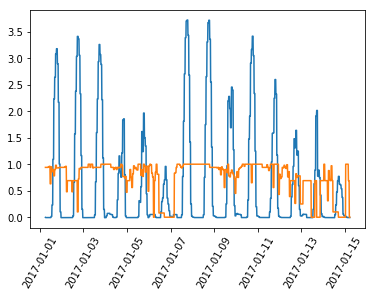

In [14]:
week = 24*4*7
plt.plot(pv_houses_austin.mean()[:week*2])
plt.plot(1 - weather_austin[:week*2])
plt.xticks(rotation=60)
plt.show()

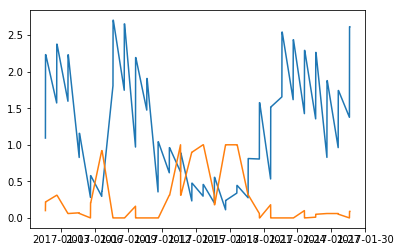

In [34]:
# pv_houses_austin.iloc[np.where((pv_houses_austin.index.hour < 18) & pv_houses_austin.index.hour > 6)].mean()[:week*2]
mean_gen_austin = pv_houses_austin.mean()
plt.plot(mean_gen_austin.iloc[np.where((mean_gen_austin.index.hour < 16) & (mean_gen_austin.index.hour > 14))][:int(week/12)*2])
plt.plot(weather_austin.iloc[np.where((weather_austin.index.hour < 16) & (weather_austin.index.hour > 14))][:int(week/12)*2])
plt.show()

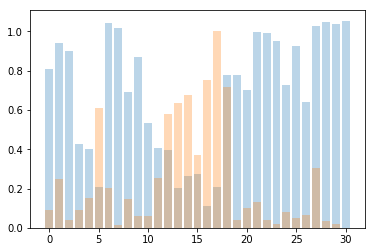

In [273]:
g = pv_houses_austin.iloc[0].groupby([pv_houses_austin.iloc[0].index.month,pv_houses_austin.iloc[0].index.day]).mean()
w = weather_austin.groupby([weather_austin.index.month, weather_austin.index.day]).mean()
plt.bar(np.arange(len(g[1])),g[1], alpha=0.3)
plt.bar(np.arange(len(g[1])),w[1][:len(g[1])*4*24], alpha=0.3)
plt.show()


Almost all houses with PV are in austin.